In [993]:
#importing libraries

import numpy as np                       # numerical computing 
import pandas as pd                      # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from datetime import date

import datetime as dt
import matplotlib.pyplot as plt          # visualization
import seaborn as sns                    # modern visualization


In [994]:
# importing the Uber request data file(csv) & checking the data file information 

df= pd.read_csv("C:/Users/nidhi/Desktop/Uber Request Data.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


In [995]:
#checking the columns and datatypes
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [996]:
#checking the dimensions of Data Set 
df.shape

(6745, 6)

In [997]:
# Splitting date & time from the 2 columns:Request timestamp & Drop timestamp & renamimg some columns for ease


df = df.rename(columns = {"Request timestamp": "Requesttimestamp", 
                                  "Drop timestamp":"Droptimestamp"}) 

df= df.rename(columns={"Pickup point": "Pickuppoint"})
df[['RequestDate', 'Request_timestamp']] = df.Requesttimestamp.str.split(' ', expand = True)


#df[['DropDate', 'Drop_timestamp']] = df.Droptimestamp.str.split(' ', expand = True)


df.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Droptimestamp,RequestDate,Request_timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11-07-2016,11:51
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,11-07-2016,17:57
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,12-07-2016,09:17
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,12-07-2016,21:08
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,08:33


In [998]:
# Overwriting data after changing format to datetime
 
df["Requesttimestamp"]= pd.to_datetime(df["Requesttimestamp"]) 

df["Droptimestamp"]= pd.to_datetime(df["Droptimestamp"]) 
  
# info of data

df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request id           6745 non-null int64
Pickuppoint          6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Requesttimestamp     6745 non-null datetime64[ns]
Droptimestamp        2831 non-null datetime64[ns]
RequestDate          6745 non-null object
Request_timestamp    6745 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.6+ KB


In [999]:
# Dropping columns which are not useful 
df= df.drop(['RequestDate', 'Droptimestamp'], axis=1)
df.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11:51
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,17:57
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,09:17
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,21:08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,08:33


In [1000]:
# number of duplicate rows of request id are zero

sum(df.duplicated(subset = "Request id")) == 0

True

In [1001]:
# Checking Duplicate data values in dataframe (if any)
df[df.duplicated(keep=False)]
df.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11:51
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,17:57
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,09:17
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,21:08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,08:33


In [1002]:
#Checking null value row wise 
df.isnull().sum()

Request id              0
Pickuppoint             0
Driver id            2650
Status                  0
Requesttimestamp        0
Request_timestamp       0
dtype: int64

In [1003]:
# Not removing the rows with null values as No Available Cars shows all the corresponding entries as NA values 

In [1004]:
# Creating a new column as timeOfDay to show the Day time interval(slot) as Morning, afternoon, evening etc.

df.assign(
    timeOfDay=pd.cut(
        df.Requesttimestamp.dt.hour,
        [-1,3, 7, 11, 16,19, 24],
        labels=['LateNight','EarlyMorning','Morning','Afternoon', 'Evening','Night']))


hours = df.Requesttimestamp.dt.hour.values
times = np.array(['LateNight','EarlyMorning','Morning','Afternoon', 'Evening','Night'])

df=df.assign(timeOfDay=times[np.array([3,7,11, 16,19]).searchsorted(hours)])
df.head(10)




,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11:51,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,17:57,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,09:17,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,21:08,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,08:33,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,21:57,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,06:15,EarlyMorning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,05:11,EarlyMorning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:00,17:57,Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,06:46,EarlyMorning


In [1005]:
# checking about dimensions  Data Set 
df.shape

(6745, 7)

In [1006]:
#checking the total count of different Status of cars at different timeOfDay 


ct= pd.crosstab(df['timeOfDay'],df['Status'])
ct



Status,Cancelled,No Cars Available,Trip Completed
timeOfDay,,,
Afternoon,91,228,491
EarlyMorning,541,307,604
Evening,83,837,481
LateNight,14,225,136
Morning,430,279,559
Night,105,774,560


In [1007]:
#checking the Total count of  Status of cars at different timeOfDay 

df.timeOfDay.value_counts()

EarlyMorning    1452
Night           1439
Evening         1401
Morning         1268
Afternoon        810
LateNight        375
Name: timeOfDay, dtype: int64

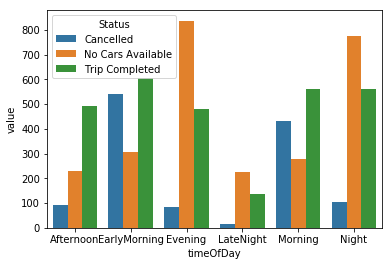

In [1008]:
# Graph to show the frequency(Count value)of requests that get cancelled, no cars available and trip completed

stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.timeOfDay, y=stacked.value, hue=stacked.Status)



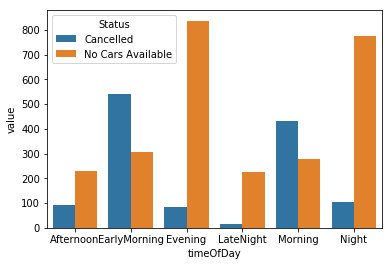

In [1009]:
c= ct.drop(columns= ["Trip Completed"], axis=1)
c

# Graph to show the frequency(Count value)of requests that get cancelled & no cars available 

stacked = c.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.timeOfDay, y=stacked.value, hue=stacked.Status)


In [1010]:
#Renaming column Trip Completed as Supply_Provided , to see the relation between Demand & Supply

ct= ct.rename(columns={"Trip Completed": "Supply_Provided"})

#ct['Total_No Supply']= ct['Cancelled']+ ct['No Cars Available']

ct['Total_Demand']= ct['Supply_Provided']+ ct['Cancelled']+ ct['No Cars Available']

ct


Status,Cancelled,No Cars Available,Supply_Provided,Total_Demand
timeOfDay,,,,
Afternoon,91,228,491,810
EarlyMorning,541,307,604,1452
Evening,83,837,481,1401
LateNight,14,225,136,375
Morning,430,279,559,1268
Night,105,774,560,1439


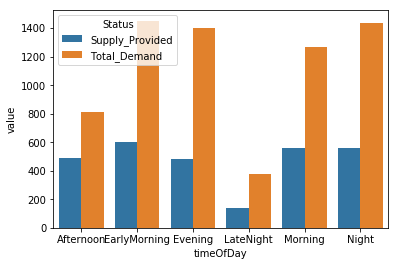

In [1011]:
#Plot between Total_No Supply and Supply_Provided

# dropping unrequired columns to get the required plot
ct_= ct.drop(['Cancelled','No Cars Available'], axis=1)

stacked = ct_.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.timeOfDay, y=stacked.value, hue=stacked.Status)


In [1012]:
#Calculating the Gap between Demand and Supply

ct['Demand_Supply_Gap']= ct['Total_Demand']- ct['Supply_Provided']
ct

Status,Cancelled,No Cars Available,Supply_Provided,Total_Demand,Demand_Supply_Gap
timeOfDay,,,,,
Afternoon,91,228,491,810,319
EarlyMorning,541,307,604,1452,848
Evening,83,837,481,1401,920
LateNight,14,225,136,375,239
Morning,430,279,559,1268,709
Night,105,774,560,1439,879


In [1013]:
# dropping unrequired columns to get the required plot
ct_gap= ct.drop(['Cancelled','No Cars Available'], axis=1)
ct_gap


Status,Supply_Provided,Total_Demand,Demand_Supply_Gap
timeOfDay,,,
Afternoon,491,810,319
EarlyMorning,604,1452,848
Evening,481,1401,920
LateNight,136,375,239
Morning,559,1268,709
Night,560,1439,879


In [1014]:
# dropping unrequired columns to get the required plot
ct_gap= ct.drop(['Cancelled','No Cars Available','Supply_Provided', 'Total_Demand'], axis=1)
ct_gap


Status,Demand_Supply_Gap
timeOfDay,
Afternoon,319
EarlyMorning,848
Evening,920
LateNight,239
Morning,709
Night,879


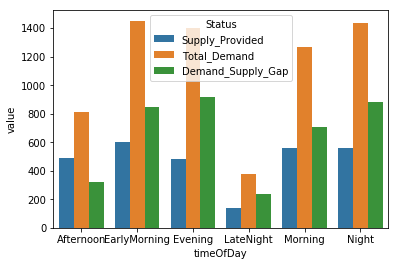

In [1015]:
#Plot between Total_Demand and Supply_Provided

# dropping unrequired columns to get the required plot
ct_modify= ct.drop(['Cancelled','No Cars Available'], axis=1)

stacked = ct_modify.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.timeOfDay, y=stacked.value, hue=stacked.Status)


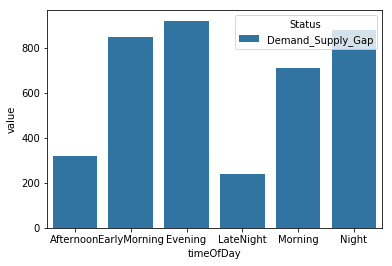

In [1016]:

#Plotting demand_supply_gap with respect to timeOfDay

stacked = ct_gap.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.timeOfDay, y=stacked.value, hue=stacked.Status)


#Demand & Supply Gap is Maximum in Evening slot (city to airport & aiport to city)

In [1017]:
#checking the Counts of cars Status at different Pickup point 

ct2= pd.crosstab(df['Pickuppoint'],df['Status'])
ct2

Status,Cancelled,No Cars Available,Trip Completed
Pickuppoint,,,
Airport,198,1713,1327
City,1066,937,1504


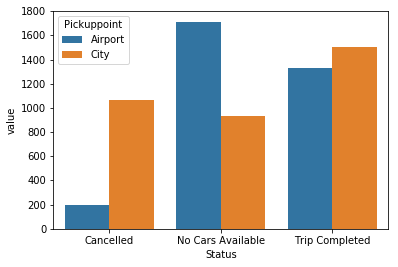

In [1018]:
# plotting bar chart to show the total counts of status of cars at different pick up points as airport & city throughout the day

stacked = ct2.stack().reset_index().rename(columns={0:'value'})

sns.barplot(x=stacked.Status, y=stacked.value, hue=stacked.Pickuppoint)


In [1019]:


#Renaming column Trip Completed as Supply_Provided , to see the relation between Demand & Supply


ct2_modify= ct2.rename(columns={"Trip Completed": "Supply_Provided"})

ct2_modify['Total_Demand']= ct2_modify['Supply_Provided']+ ct2_modify['Cancelled']+ ct2_modify['No Cars Available']
ct2_modify



Status,Cancelled,No Cars Available,Supply_Provided,Total_Demand
Pickuppoint,,,,
Airport,198,1713,1327,3238
City,1066,937,1504,3507


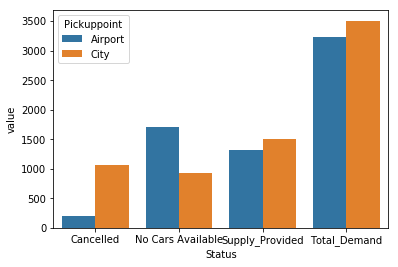

In [1020]:
#Plot between Total_Demand and Supply_Provided from City to Airport and from Airport to City at different timeslots

stacked = ct2_modify.stack().reset_index().rename(columns={0:'value'})

sns.barplot(x=stacked.Status, y=stacked.value, hue=stacked.Pickuppoint)

In [1021]:
# dropping unrequired columns to get the required plot of demand supply gap

ct2_modify= ct2_modify.drop(['Cancelled','No Cars Available'], axis=1)

In [1022]:
# Calculating deamnd supply gap

ct2_modify['Gap']= ct2_modify['Total_Demand']- ct2_modify['Supply_Provided']

ct2_modify

Status,Supply_Provided,Total_Demand,Gap
Pickuppoint,,,
Airport,1327,3238,1911
City,1504,3507,2003


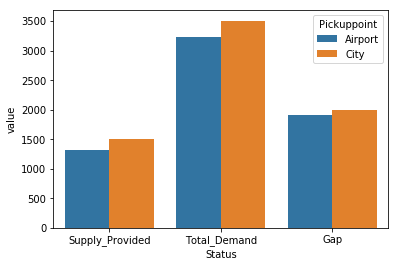

In [1023]:
#Plotting

stacked = ct2_modify.stack().reset_index().rename(columns={0:'value'})

sns.barplot(x=stacked.Status, y=stacked.value, hue=stacked.Pickuppoint)

In [1024]:
ct2_modify= ct2_modify.drop(['Total_Demand', 'Supply_Provided'], axis=1)
ct2_modify

Status,Gap
Pickuppoint,
Airport,1911
City,2003


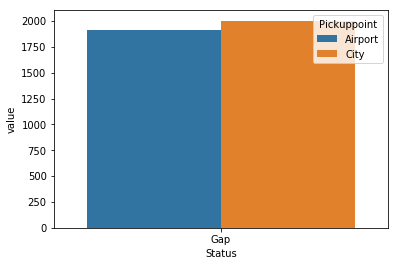

In [1025]:
#Plotting the Gap between Demand & Supply from Airport to City and City to Airport at all the timeslots overall


stacked = ct2_modify.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Status, y=stacked.value, hue=stacked.Pickuppoint)


# this plot shows that demand supply gap is more from City to Airport (overall)

In [1026]:
#checking the Counts between Pickup point and timeOfDay
# Shows the Total Demand(trip completed, cancelled, no available cars--- all) From Airport to City & City to Airport at different timeslots

ct3= pd.crosstab(df['Pickuppoint'],df['timeOfDay'])
ct3



timeOfDay,Afternoon,EarlyMorning,Evening,LateNight,Morning,Night
Pickuppoint,,,,,,
Airport,339,336,1079,181,301,1002
City,471,1116,322,194,967,437


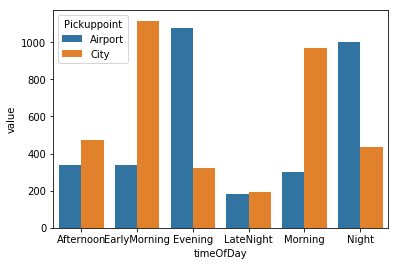

In [1027]:
#Plot between Pickuppoint(total demand)  and timeOfDay 

stacked = ct3.stack().reset_index().rename(columns={0:'value'})

sns.barplot(x=stacked.timeOfDay, y=stacked.value, hue=stacked.Pickuppoint)

In [1028]:
#Filtering dataframe based on time slots

Uber_Cab_EarlyMorning= df[df.timeOfDay == "EarlyMorning"]
Uber_Cab_EarlyMorning.head()


,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,06:15,EarlyMorning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,05:11,EarlyMorning
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,06:46,EarlyMorning
10,1467,Airport,2.0,Trip Completed,2016-12-07 05:08:00,05:08,EarlyMorning
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:00,04:49,EarlyMorning


In [1029]:
Uber_Cab_Morning= df[df.timeOfDay == "Morning"]
Uber_Cab_Morning.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11:51,Morning
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,09:17,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,08:33,Morning
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:00,08:02,Morning
18,535,Airport,3.0,Trip Completed,2016-11-07 10:00:00,10:00,Morning


In [1030]:
Uber_Cab_Afternoon= df[df.timeOfDay == "Afternoon"]
Uber_Cab_Afternoon.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
11,1983,City,2.0,Trip Completed,2016-12-07 12:30:00,12:30,Afternoon
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:00,14:23,Afternoon
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:00,12:01,Afternoon
21,2083,Airport,3.0,Trip Completed,2016-12-07 15:46:00,15:46,Afternoon
28,669,City,4.0,Trip Completed,2016-11-07 13:08:00,13:08,Afternoon


In [1031]:
Uber_Cab_Evening= df[df.timeOfDay == "Evening"]
Uber_Cab_Evening.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,17:57,Evening
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:00,17:57,Evening
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:00,17:23,Evening
19,960,Airport,3.0,Trip Completed,2016-11-07 18:45:00,18:45,Evening
22,2211,Airport,3.0,Trip Completed,2016-12-07 18:00:00,18:00,Evening


In [1032]:
Uber_Cab_Night= df[df.timeOfDay == "Night"]
Uber_Cab_Night.head()


,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,21:08,Night
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,21:57,Night
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:00,22:24,Night
24,3881,Airport,3.0,Trip Completed,2016-07-13 21:54:00,21:54,Night
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:00,21:23,Night


In [1033]:

Uber_Cab_LateNight= df[df.timeOfDay == "LateNight"]
Uber_Cab_LateNight.head()

,Request id,Pickuppoint,Driver id,Status,Requesttimestamp,Request_timestamp,timeOfDay
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:00,02:41,LateNight
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:00,02:17,LateNight
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:00,02:37,LateNight
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:00,00:03,LateNight
62,4105,City,7.0,Trip Completed,2016-07-14 03:39:00,03:39,LateNight


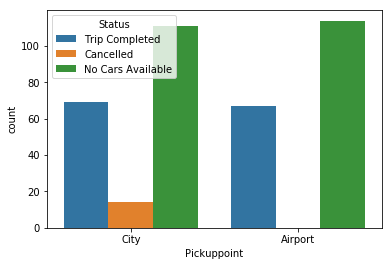

In [1034]:
#Plot to show the Count of Status for City & Airport for LateNight

sns.countplot(x = "Pickuppoint", hue = "Status", data = Uber_Cab_LateNight)

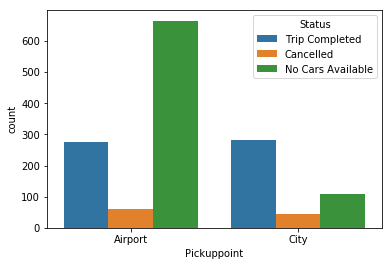

In [1035]:
#Plot to show the Count of Status for City & Airport at Night

sns.countplot(x = "Pickuppoint", hue = "Status", data = Uber_Cab_Night)


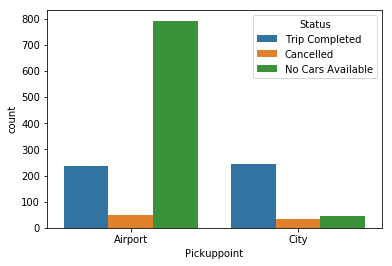

In [1036]:
#Plot to show the Count of Status for City & Airport at Evening

sns.countplot(x = "Pickuppoint", hue = "Status", data = Uber_Cab_Evening)

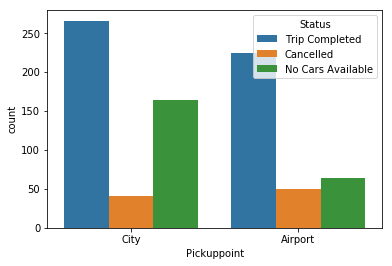

In [1037]:
#Plot to show the Count of Status for City & Airport at Afternoon

sns.countplot(x = "Pickuppoint", hue = "Status", data = Uber_Cab_Afternoon)

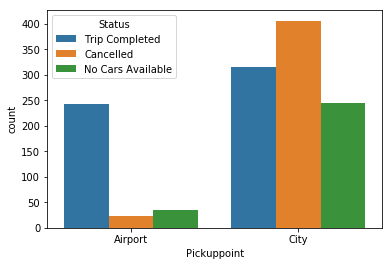

In [1038]:
#Plot to show the Count of Status for City & Airport at Morning
sns.countplot(x = "Pickuppoint", hue = "Status", data = Uber_Cab_Morning)

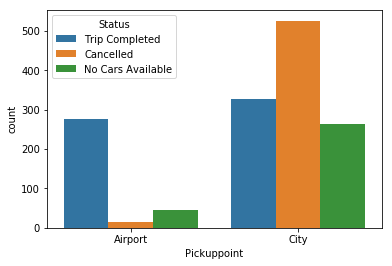

In [1039]:
#Plot to show the Count of Status for City & Airport at EarlyMorning
sns.countplot(x = "Pickuppoint", hue = "Status", data = Uber_Cab_EarlyMorning)

In [1040]:
# to check Pickup point and Status at various timeslots


data = df.pivot_table(index=["Status","Pickuppoint","timeOfDay"],aggfunc="count")
data.reset_index(inplace=True)
data.head()


Alldata= data.drop(['Driver id','Request id','Requesttimestamp'], axis=1)
Alldata.head()


,Status,Pickuppoint,timeOfDay,Request_timestamp
0,Cancelled,Airport,Afternoon,50
1,Cancelled,Airport,EarlyMorning,15
2,Cancelled,Airport,Evening,49
3,Cancelled,Airport,Morning,24
4,Cancelled,Airport,Night,60


In [1041]:
# Checking only the Problematic Status i.e,Cancelled cars & No cars Available count from Airport & City 

df_NoSupply= data.loc[data['Status'] !='Trip Completed']
df_NoSupply=df_NoSupply.drop(['Driver id','Request id','Requesttimestamp'], axis=1)
df_NoSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
0,Cancelled,Airport,Afternoon,50
1,Cancelled,Airport,EarlyMorning,15
2,Cancelled,Airport,Evening,49
3,Cancelled,Airport,Morning,24
4,Cancelled,Airport,Night,60
5,Cancelled,City,Afternoon,41
6,Cancelled,City,EarlyMorning,526
7,Cancelled,City,Evening,34
8,Cancelled,City,LateNight,14
9,Cancelled,City,Morning,406


In [1042]:
Uber_Cab_EarlyMorning_NOSupply= df_NoSupply[df_NoSupply.timeOfDay == "EarlyMorning"]
Uber_Cab_EarlyMorning_NOSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
1,Cancelled,Airport,EarlyMorning,15
6,Cancelled,City,EarlyMorning,526
12,No Cars Available,Airport,EarlyMorning,44
18,No Cars Available,City,EarlyMorning,263


In [1043]:
Uber_Cab_Morning_NOSupply= df_NoSupply[df_NoSupply.timeOfDay == "Morning"]
Uber_Cab_Morning_NOSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
3,Cancelled,Airport,Morning,24
9,Cancelled,City,Morning,406
15,No Cars Available,Airport,Morning,34
21,No Cars Available,City,Morning,245


In [1044]:
Uber_Cab_Afternoon_NOSupply= df_NoSupply[df_NoSupply.timeOfDay == "Afternoon"]
Uber_Cab_Afternoon_NOSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
0,Cancelled,Airport,Afternoon,50
5,Cancelled,City,Afternoon,41
11,No Cars Available,Airport,Afternoon,64
17,No Cars Available,City,Afternoon,164


In [1045]:
Uber_Cab_Evening_NOSupply= df_NoSupply[df_NoSupply.timeOfDay == "Evening"]
Uber_Cab_Evening_NOSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
2,Cancelled,Airport,Evening,49
7,Cancelled,City,Evening,34
13,No Cars Available,Airport,Evening,792
19,No Cars Available,City,Evening,45


In [1046]:
Uber_Cab_Night_NOSupply= df_NoSupply[df_NoSupply.timeOfDay == "Night"]
Uber_Cab_Night_NOSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
4,Cancelled,Airport,Night,60
10,Cancelled,City,Night,45
16,No Cars Available,Airport,Night,665
22,No Cars Available,City,Night,109


In [1047]:
Uber_Cab_LateNight_NOSupply= df_NoSupply[df_NoSupply.timeOfDay == "LateNight"]
Uber_Cab_LateNight_NOSupply

,Status,Pickuppoint,timeOfDay,Request_timestamp
8,Cancelled,City,LateNight,14
14,No Cars Available,Airport,LateNight,114
20,No Cars Available,City,LateNight,111


In [1048]:
# Checking demand status at various time slots

demand=Alldata.pivot_table(index=["Pickuppoint","timeOfDay"],aggfunc="sum")
print(list(demand["Request_timestamp"]))
demand.reset_index(inplace=True)
demand["type"]="demand"
demand

[339, 336, 1079, 181, 301, 1002, 471, 1116, 322, 194, 967, 437]


,Pickuppoint,timeOfDay,Request_timestamp,type
0,Airport,Afternoon,339,demand
1,Airport,EarlyMorning,336,demand
2,Airport,Evening,1079,demand
3,Airport,LateNight,181,demand
4,Airport,Morning,301,demand
5,Airport,Night,1002,demand
6,City,Afternoon,471,demand
7,City,EarlyMorning,1116,demand
8,City,Evening,322,demand
9,City,LateNight,194,demand


In [1049]:
# Checking supply status at various time slots

supply=Alldata.loc[Alldata.Status=="Trip Completed"].pivot_table(index=["Pickuppoint","timeOfDay"],aggfunc="sum")
print(list(supply["Request_timestamp"]))
supply.reset_index(inplace=True)
supply["type"]="supply"
supply

[225, 277, 238, 67, 243, 277, 266, 327, 243, 69, 316, 283]


,Pickuppoint,timeOfDay,Request_timestamp,type
0,Airport,Afternoon,225,supply
1,Airport,EarlyMorning,277,supply
2,Airport,Evening,238,supply
3,Airport,LateNight,67,supply
4,Airport,Morning,243,supply
5,Airport,Night,277,supply
6,City,Afternoon,266,supply
7,City,EarlyMorning,327,supply
8,City,Evening,243,supply
9,City,LateNight,69,supply


In [1050]:

#Total Count of Supply & Demand from Airport & City

details_supply_demand= supply.append(demand,sort=False)
details_supply_demand


,Pickuppoint,timeOfDay,Request_timestamp,type
0,Airport,Afternoon,225,supply
1,Airport,EarlyMorning,277,supply
2,Airport,Evening,238,supply
3,Airport,LateNight,67,supply
4,Airport,Morning,243,supply
5,Airport,Night,277,supply
6,City,Afternoon,266,supply
7,City,EarlyMorning,327,supply
8,City,Evening,243,supply
9,City,LateNight,69,supply


Text(0.5,1,'Pick up : City')

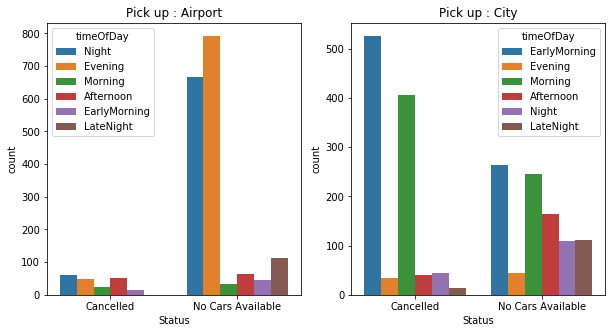

In [696]:
#Graph to show the Most Problematic type of Request at City & Airport as pick up point and the problematic time slot


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x= 'Status', data=df[(df['Status'] != 'Trip Completed') & (df['Pickuppoint'] == 'Airport')], hue='timeOfDay')
plt.title(("Pick up : Airport"))

plt.subplot(1,2,2)
sns.countplot(x= 'Status', data=df[(df['Status'] != 'Trip Completed') & (df['Pickuppoint'] == 'City')], hue='timeOfDay')
plt.title(("Pick up : City"))
